In [7]:
import tensorflow as tf

In [8]:
import pandas as pd
import numpy as np

In [3]:
import os

In [4]:
data_sub = pd.read_csv("icml_face_data.csv")

In [5]:
data_sub.shape

(35887, 3)

In [6]:
label = data_sub.iloc[:,0]
train = data_sub.iloc[:,2]
y_train = label[:32000]
y_test = label[32000:]

In [6]:
for i in range(len(train)):
    train[i] = train[i].split(" ")

C:\Users\kumar\.conda\envs\Navi\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
for i in range(len(train)):
    train[i] = np.array(train[i]).astype(float)

C:\Users\kumar\.conda\envs\Navi\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\kumar\.conda\envs\Navi\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


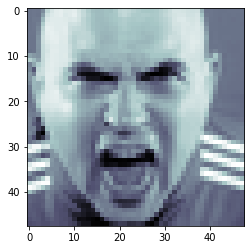

In [9]:
image = np.reshape(train[22], (48,48))
plt.imshow(image, cmap = plt.cm.bone )

In [10]:
import csv
with open('train_data_32000.csv','w', newline='') as file:
    writer = csv.writer(file)
    a = []
    for i in range(len(train[0])):
        a.append(i)
    writer.writerow(a)
    for i in range(len(train)):
        writer.writerow(train[i])

In [9]:
data_set = pd.read_csv('train_data_32000.csv')

In [10]:
X_train = data_set[:32000]
X_test = data_set[32000:]

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [12]:
import tensorflow as tf


In [13]:
batch_size = 32
num_class = 7
epochs = 30
num_feature = 32
width, height = 48,48


In [14]:
x_train_reshaped = (np.array(X_train)).reshape(X_train.shape[0], width, height, 1)
x_test_reshaped = (np.array(X_test)).reshape(X_test.shape[0], width, height, 1)

In [15]:
y_train = tf.keras.utils.to_categorical(y_train, num_class)
y_test = tf.keras.utils.to_categorical(y_test, num_class)

In [16]:
print(x_train_reshaped.shape)
print(x_test_reshaped.shape)
print(y_train.shape)
print(y_test.shape)

(32000, 48, 48, 1)
(3887, 48, 48, 1)
(32000, 7)
(3887, 7)


In [17]:
import tensorflow as tf

In [ ]:
modelab = Sequential()
modelab.add(Conv2D(96, (3,3), activation = "relu ", padding = 'same '))

In [20]:
model = Sequential()
model.add(Conv2D(num_feature, kernel_size=(3,3),padding="same", activation='relu', input_shape = (x_train_reshaped.shape[1:])))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(num_feature,kernel_size=(3,3),padding="same", activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), padding = 'same'))
model.add(Dropout(0.2))

In [21]:
#second layer 
model.add(Conv2D(num_feature*2,kernel_size = (3,3),padding="same", activation ='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(num_feature*2,kernel_size = (3,3),padding="same", activation ='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), padding = 'same'))
model.add(Dropout(0.2))


In [22]:
#third layer
model.add(Conv2D(num_feature*4,kernel_size = (3,3),padding="same", activation ='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(num_feature*4,kernel_size = (3,3),padding="same", activation ='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), padding = 'same'))
model.add(Dropout(0.2))


In [23]:
#fourth layer
model.add(Conv2D(num_feature*8,kernel_size = (3,3),padding="same", activation ='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(num_feature*8,kernel_size = (3,3),padding="same", activation ='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), padding = 'same'))
model.add(Dropout(0.2))


In [24]:
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(16*num_feature, activation = 'sigmoid'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(7, activation = 'softmax'))

In [25]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        1

In [26]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [27]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
model.fit(x_train_reshaped, y_train, batch_size = batch_size, epochs = epochs, verbose = 1,
         validation_data= (x_test_reshaped, y_test), shuffle = True)

Train on 32000 samples, validate on 3887 samples
Epoch 1/30
32000/32000 [==============================] - 31s 954us/sample - loss: 0.2067 - accuracy: 0.9298 - val_loss: 1.4780 - val_accuracy: 0.6524
Epoch 2/30
32000/32000 [==============================] - 30s 939us/sample - loss: 0.1943 - accuracy: 0.9330 - val_loss: 1.5652 - val_accuracy: 0.6434
Epoch 3/30
32000/32000 [==============================] - 33s 1ms/sample - loss: 0.1851 - accuracy: 0.9359 - val_loss: 1.5486 - val_accuracy: 0.6571
Epoch 4/30
32000/32000 [==============================] - 30s 948us/sample - loss: 0.1778 - accuracy: 0.9393 - val_loss: 1.5431 - val_accuracy: 0.6481
Epoch 5/30
32000/32000 [==============================] - 30s 943us/sample - loss: 0.1727 - accuracy: 0.9405 - val_loss: 1.6233 - val_accuracy: 0.6470
Epoch 6/30
32000/32000 [==============================] - 30s 949us/sample - loss: 0.1749 - accuracy: 0.9397 - val_loss: 1.5543 - val_accuracy: 0.6568
Epoch 7/30
32000/32000 [=======================

In [49]:
model.save("facial_sentiment_trained_32000.h5")

In [50]:
probability = model1.predict(x_test_reshaped)
class1 = model1.predict_classes(x_test_reshaped)


In [107]:
# load and show an image with Pillow
from PIL import Image
# Open the image form working directory
image = Image.open('test.png')
# summarize some details about the image
print(image.format)
print(image.size)
print(image.mode)
# show the image
image.show()

PNG
(402, 377)
L


float32
(377, 402)


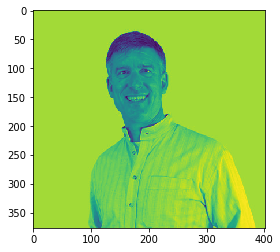

In [109]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
image = image.imread('test.png')
# summarize shape of the pixel array
print(image.dtype)
print(image.shape)
# display the array of pixels as an image
pyplot.imshow(image)
pyplot.show()

In [149]:
pyplot.savefig("fs.png")

<Figure size 432x288 with 0 Axes>

In [9]:
from PIL import Image
from numpy import asarray
# load the image
image = Image.open('test.png')
# convert image to numpy array
data = asarray(image)
print(type(data))
# summarize shape
print(data.shape)

# create Pillow image
image2 = Image.fromarray(data)
image2.show()

# summarize image details
print(image2.mode)
print(image2.size)



<class 'numpy.ndarray'>
(377, 402)
L
(402, 377)


array([221, 221, 221, 221, 221, 221, 221, 221, 221, 221, 221, 221, 221,
       221, 221, 221, 221, 221, 221, 221, 221, 221, 221, 221, 221, 221,
       221, 221, 221, 221, 221, 221, 221, 221, 221, 221, 221, 221, 221,
       221, 221, 221, 221, 221, 221, 221, 221, 221, 221, 221, 221, 221,
       221, 221, 221, 221, 221, 221, 221, 221, 221, 221, 221, 221, 221,
       221, 221, 221, 221, 221, 221, 221, 221, 221, 221, 221, 221, 221,
       221, 221, 221, 221, 221, 221, 221, 221, 221, 221, 221, 221, 221,
       221, 221, 221, 221, 221, 220, 220, 222, 206, 201, 194, 187, 180,
       192, 196, 200, 198, 194, 194, 199, 204, 203, 197, 197, 200, 203,
       202, 196, 193, 196, 198, 201, 203, 203, 199, 195, 193, 198, 199,
       201, 202, 203, 202, 198, 194, 197, 200, 202, 204, 205, 206, 205,
       203, 199, 194, 193, 198, 200, 202, 204, 206, 204, 203, 201, 195,
       192, 192, 193, 195, 190, 194, 199, 195, 190, 198, 213, 220, 218,
       220, 218, 222, 223, 218, 215, 207, 207, 206, 204, 207, 20

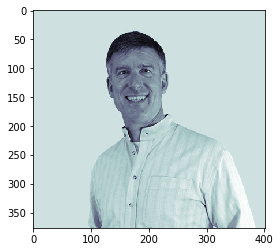

In [123]:

plt.imshow(data, cmap = plt.cm.bone )

In [126]:
from PIL import Image
 # My image is a 200x374 jpeg that is 102kb large
foo = Image.open("test.png")
foo.size

 # I downsize the image with an ANTIALIAS filter (gives the highest quality)
foo = foo.resize((48,48),Image.ANTIALIAS)
foo.save("image_scaled.jpg",quality=95)

foo.save("image_scaled_opt.jpg",optimize=True,quality=95)
# The saved downsized image size is 22.9kb

In [127]:
a = Image.open("image_scaled.jpg")

In [128]:
a.size

(48, 48)

In [134]:
AA =(np.array(a)).reshape(1,48,48,1)

In [135]:
probability = model.predict(AA)

In [133]:
x_test_reshaped.shape

(3887, 48, 48, 1)

In [142]:
class1 = model1.predict_classes(AA)

In [143]:
class1[0]

2

In [144]:
train[22].save("image_for_test.")

AttributeError: 'numpy.ndarray' object has no attribute 'save'

TypeError: Image data of dtype <U18 cannot be converted to float

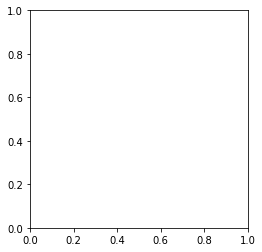

In [10]:
plt.imshow("image_for_test.png", cmap = plt.cm.bone)

In [3]:
import matplotlib.pyplot as plt

In [11]:
from PIL import Image
from numpy import asarray
# load the image
image = Image.open('image_for_test.png.png')
# convert image to numpy array
data = asarray(image)
print(type(data))
# summarize shape
print(data.shape)

# create Pillow image
image2 = Image.fromarray(data)
image2.show()

FileNotFoundError: [Errno 2] No such file or directory: 'image_for_test.png.png'